# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression              # for simulating data
from sklearn.model_selection import train_test_split      # splitting training and test data
from sklearn.linear_model import LinearRegression         # making the linear predictor model
from sklearn.metrics import mean_squared_error, r2_score  # compute some diagnostics

**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

In [61]:
# load the dataaset
titanic = pd.read_csv('data/titanicMachLearn.csv')
titanic

,SES,Fare,Survived
0,39,15,0
1,83,33,1
2,98,25,1
3,67,33,1
4,36,14,0
...,...,...,...
886,4,11,0
887,54,33,1
888,25,11,0
889,52,32,1


In [62]:
y = np.array(titanic.iloc[:,2:3]).ravel() # turn into 1d array
X = np.array(titanic.iloc[:,0:2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# shapes of the new data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 2), (179, 2), (712,), (179,))

In [64]:
from sklearn.neighbors import KNeighborsClassifier

# Create the K-Nearest Neighbors classifier with k=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [65]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
y_pred.shape, y_test.shape # good they're the same shape

((179,), (179,))

In [68]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print('\nHere is the confusion matrix:')
print('True labels are the rows and the predicted labels are the columns')
print([0,1])
print(conf_matrix)

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 1.00%

Here is the confusion matrix:
True labels are the rows and the predicted labels are the columns
[0, 1]
[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



The model was performed very well, and perfectly classified every example

**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

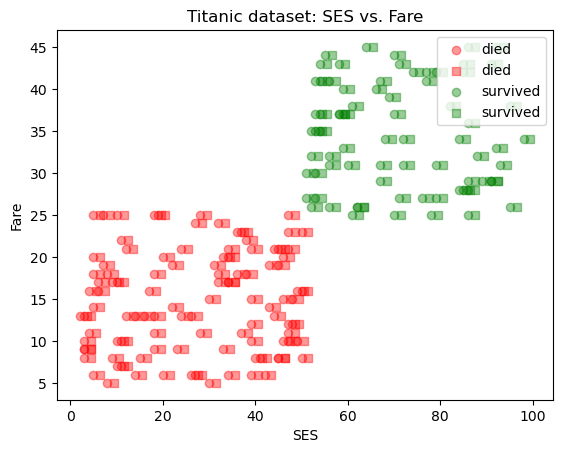

In [76]:
colors = ['red', 'green']
survival = ['died', 'survived']
offset = 1.5 # small offset to see both sets of values

for i, color, target_name in zip(range(2), colors, survival):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], 
                color=color, label=target_name, alpha = 0.4)
    plt.scatter(X_test[y_test == i, 0]+offset, X_test[y_test == i, 1], 
                color=color, marker = 's', label=target_name, alpha = 0.4)

plt.xlabel(titanic.columns[0])  # Sepal length
plt.ylabel(titanic.columns[1])  # Sepal width
plt.legend(loc="lower right")
plt.title("Titanic dataset: SES vs. Fare")
plt.show()

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best based on the pair-pair plot we did in class (i.e. don't use the exact same variables we used in the in-class tutorial).

Compare the results with the results we got in class using the first two variables.

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [80]:
# use only petal length and petal width as features
iris.feature_names[2:4]
X = iris.data[:, 2:4]
y = iris.target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [82]:
k = 3
knn = KNeighborsClassifier(n_neighbors=3)

In [83]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [84]:
y_pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [85]:
y_test.shape, y_pred.shape

((30,), (30,))

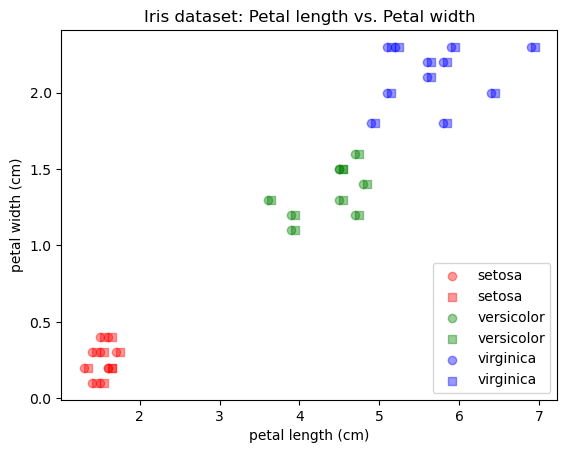

In [88]:
# plotting
colors = ['red', 'green', 'blue']
species = iris.target_names

offset = 0.05 # small offset to see both sets of values

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1], 
                color=color, label=target_name, alpha = 0.4)
    plt.scatter(X_test[y_test == i, 0]+offset, X_test[y_test == i, 1], 
                color=color, marker = 's', label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[2])  # Sepal length
plt.ylabel(iris.feature_names[3])  # Sepal width
plt.legend(loc="lower right")
plt.title("Iris dataset: Petal length vs. Petal width")
plt.show()

In [91]:
# assessing model performance
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc_score:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nTrue labels are the rows and predicted labels are the columns')
print(species)
print(conf_matrix)

cls_report = classification_report(y_test, y_pred)
print(cls_report)

Accuracy Score: 1.00%

True labels are the rows and predicted labels are the columns
['setosa' 'versicolor' 'virginica']
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The model that classified species based on petal length and width was much better than the model that used sepal length and sepal width. This new model had 100% accuracy whereas the other model only had 77% accuracy. Furthermore, the new model scored better on every other measure of model fit.